<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme des régions de confiance </h1>
</center>

# Régions de confiance avec Pas de Cauchy 

## Implémentation 

1. Coder l'algorithme du pas de Cauchy dans le fichier `src/cauchy.jl`). La spécification de cet algorithme est donnée dans le fichier.
2. Ecrire des tests exhaustifs (qui testent tous les cas de figure possibles) pour votre algorithme du pas de Cauchy. Vous remplirez pour cela le fichier `test/tester_cauchy.jl` sur le modèle des autres fichiers de tests et vous exécuterez dans la cellule de code ci-après ces tests.

In [1]:
include("../src/cauchy.jl")         # votre algorithme
include("../test/tester_cauchy.jl") # la fonction pour tester votre algorithme

#
tester_cauchy(cauchy); # tester l'algorithme

Test Summary: | Pass  Total  Time
Pas de Cauchy |    5      5  0.4s


3. Coder l'algorithme des régions de confiance (fichier `src/regions_de_confiance.jl`). Sa spécification est donnée dans le fichier.
4. Vérifier que les tests ci-dessous passent.

In [2]:
include("../src/regions_de_confiance.jl")
include("../test/tester_rc_cauchy.jl")

#
afficher = false # si true, alors affiche les résultats des algorithmes

#
tester_rc_cauchy(regions_de_confiance, afficher);

Affichage des résultats des algorithmes : false

Test Summary:        | Pass  Total  Time
RC et pas de Cauchy  |   15     15  2.4s


## Interprétation 

<!-- Pour ces questions, des représentations graphiques sont attendues pour corroborer vos réponses. -->

1. Soit la fonction $f_1 \colon \mathbb{R}^3 \to \mathbb{R}$ définie par
$$ 
    f_1(x_1,x_2, x_3) = 2 (x_1 +x_2 + x_3 -3)^2 + (x_1-x_2)^2 + (x_2 - x_3)^2
$$ 
Quelle relation lie la fonction $f_1$ et son modèle de Taylor à l’ordre 2 ? Comparer alors les performances de l'algorithme de Newton et celui des régions de confiance avec le pas de Cauchy sur cette fonction.

2. Le rayon initial de la région de confiance est un paramètre important dans l’analyse
de la performance de l’algorithme. Sur quel(s) autre(s) paramètre(s) peut-on jouer
pour essayer d’améliorer cette performance ? Étudier l’influence d’au moins deux de
ces paramètres. Pour cela vous ferez des tests numériques et donnerez les résultats sous forme de tableaux et de graphiques.

## Question 1 : 
$f_1$ est une fonction quadratique, donc son développement de Taylor d’ordre 2 est exactement égal à $f_1$. Autrement dit, le modèle quadratique coïncide avec la fonction elle-même.

-------------------------------------------------------------------------
Résultats de : Newton appliqué à fct1:
  * x0       = [1.0, 0.0, 0.0]
  * x_sol    = [1.0, 1.0, 0.9999999999999999]
  * f(x_sol) = 1.232595164407831e-32
  * nb_iters = 1
  * flag     = 0
  * solution = [1.0, 1.0, 1.0]
-------------------------------------------------------------------------
Résultats de : Régions de Confiance (Cauchy) appliqué à fct1:
  * x0       = [1.0, 0.0, 0.0]
  * x_sol    = [1.0004314886457546, 0.9999414773260699, 0.9994514660063852]
  * f(x_sol) = 5.418704473891226e-7
  * nb_iters = 20
  * flag     = 2
  * solution = [1.0, 1.0, 1.0]
-------------------------------------------------------------------------
Résultats de : Newton appliqué à fct1:
  * x0       = [10.0, 3.0, -2.2]
  * x_sol    = [1.0, 0.9999999999999996, 0.9999999999999987]
  * f(x_sol) = 7.296963373294359e-30
  * nb_iters = 1
  * flag     = 0
  * solution = [1.0, 1.0, 1.0]
------------------------------------------------------

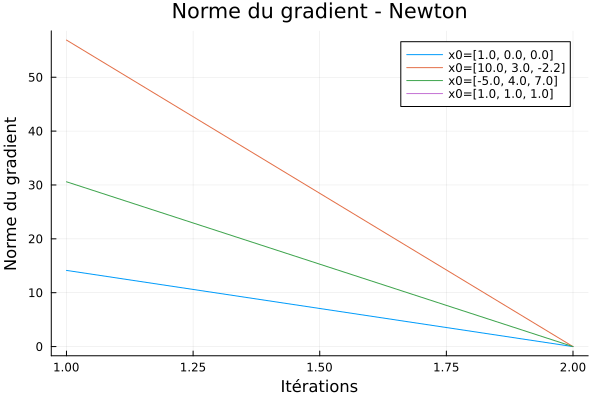

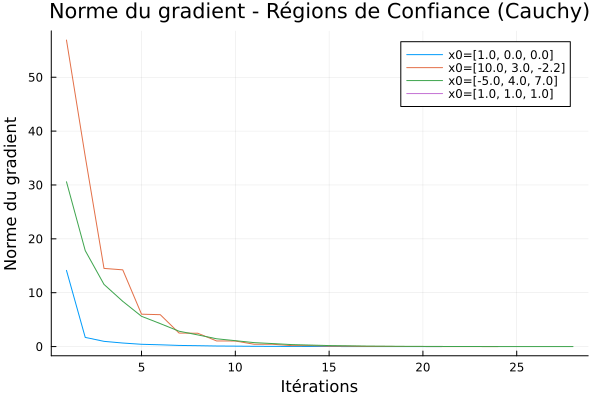

In [3]:
using Plots
using LinearAlgebra

# Inclusion des fichiers nécessaires
include("../src/newton.jl")
include("../src/cauchy.jl")
include("../src/regions_de_confiance.jl")
include("../test/fonctions_de_tests.jl")

# Points initiaux
x011 = [1; 0; 0]
x012 = [10; 3; -2.2]
x021 = [-5; 4; 7]
x0_newton = [1.0, 1.0, 1.0]
x = [x011, x012, x021, x0_newton]

# Initialisation des graphiques
plot_gradient_newton = plot(title="Norme du gradient - Newton", xlabel="Itérations", ylabel="Norme du gradient")
plot_gradient_rc = plot(title="Norme du gradient - Régions de Confiance (Cauchy)", xlabel="Itérations", ylabel="Norme du gradient")

for x0 in x
    # Test de l'algorithme de Newton
    x_sol_newton, f_sol_newton, flag_newton, nb_iters_newton, xs_newton = newton(fct1, grad_fct1, hess_fct1, x0)
    convergence_newton = [norm(grad_fct1(x)) for x in xs_newton]
    afficher_resultats("Newton", "fct1", x0, x_sol_newton, f_sol_newton, flag_newton, nb_iters_newton, [1.0, 1.0, 1.0])

    # Test de l'algorithme des Régions de Confiance
    rc_result = regions_de_confiance(
        fct1, grad_fct1, hess_fct1, x0,
        max_iter=5000, tol_abs=1e-6, tol_rel=1e-6, epsilon=1,
        Δ0=2, Δmax=10, γ1=0.5, γ2=2, η1=0.25, η2=0.75,
        algo_pas="cauchy", max_iter_gct=2 * length(x0_newton)
    )

    x_sol_rc_cauchy, f_sol_rc_cauchy, flag_rc_cauchy, nb_iters_rc_cauchy, xs_rc_cauchy = rc_result


    afficher_resultats("Régions de Confiance (Cauchy)", "fct1", x0, x_sol_rc_cauchy, f_sol_rc_cauchy, flag_rc_cauchy, nb_iters_rc_cauchy, [1.0, 1.0, 1.0])

    convergence_rc_cauchy = [norm(grad_fct1(x)) for x in xs_rc_cauchy]
    plot!(plot_gradient_rc, 1:length(convergence_rc_cauchy), convergence_rc_cauchy, label="x0=$(x0)")

    plot!(plot_gradient_newton, 1:length(convergence_newton), convergence_newton, label="x0=$(x0)")
end

# Affichage des graphiques
display(plot_gradient_newton)
display(plot_gradient_rc)


## Interprétation des Résultats du graphe : 
#### executez pour afficher le graphe
### Pour Newton :
- Convergence en **0 ou 1 itération**, quel que soit le point de départ.
- Normal car \(f_1\) est quadratique et son développement de Taylor d'ordre 2 est exact.
- La méthode utilise directement ce modèle pour trouver le minimum.
- Précision élevée : Erreurs de l'ordre de \(10^{-30}\).
- Pour \(x_0 = [1, 1, 1]\), **0 itération**, car le point initial est déjà la solution.

### Pour les Régions de Confiance (Cauchy) :
- Nombre d'itérations : Varie entre 0 et 27 selon le point initial.
- Plus $x_0$ est éloigné, plus d'itérations sont nécessaires (27 pour \([-5, 4, 7]\), 20 pour \([1, 0, 0]\)).
- Précision moindre : Environ \(10^{-7}\), mais reste satisfaisante.
- Convergence plus lente et prudente (contrôle de la taille des pas).
- Pour \(x_0 = [1, 1, 1]\), **0 itération**, car c'est déjà la solution.

### Différences :
- **Newton :** Optimal pour les fonctions quadratiques, rapide mais risqué en général.
- **Régions de Confiance :** Plus robustes mais plus lentes, avec un contrôle des pas.


## Question 2 : 
Outre le rayon initial **Δ0**, on peut jouer sur les paramètres γ1 ,γ2  et η1, η2  afin d’améliorer la performance de l’algorithme.
Voici un graphe afin de visualiser cela :

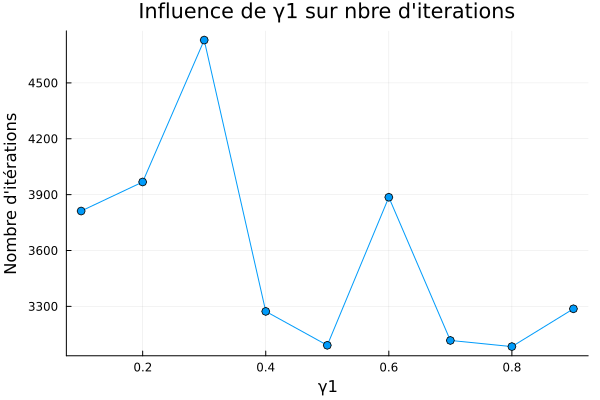

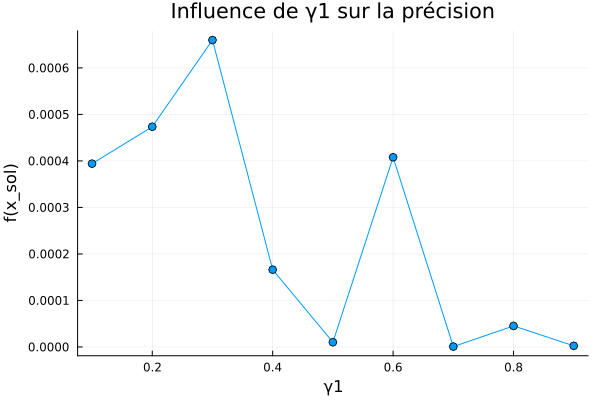

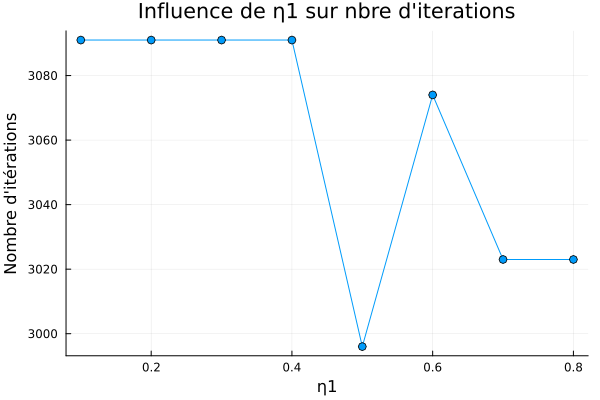

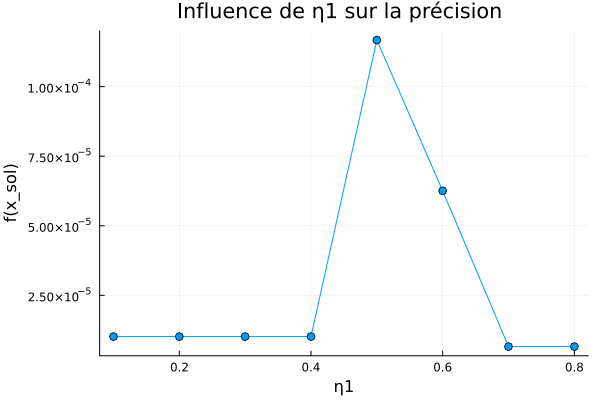

In [4]:
using Plots
using LinearAlgebra

# Inclusion des fichiers nécessaires
include("../src/newton.jl")
include("../src/cauchy.jl")
include("../src/regions_de_confiance.jl")
include("../test/fonctions_de_tests.jl")

# Point initial (éloigné pour mieux visualiser)
x0 = [1.0; 3.0]

################################################################################
# 1) Variation de gamma1
################################################################################

# On fixe gamma2, eta1, eta2
fixed_γ2  = 2.5
fixed_η1  = 0.2
fixed_η2  = 0.8

# On fait varier gamma1
gamma1_values = [0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9]

iteration_data_gamma1 = Float64[]
precision_data_gamma1 = Float64[]

for γ1 in gamma1_values
    x_sol, f_sol, flag, nb_iters, xs = regions_de_confiance(
        fct2, grad_fct2, hess_fct2, x0;
        max_iter=5000, tol_abs=1e-6, tol_rel=1e-6, epsilon=1,
        Δ0=2, Δmax=10,
        γ1=γ1, γ2=fixed_γ2,
        η1=fixed_η1, η2=fixed_η2,
        algo_pas="cauchy"
    )


    push!(iteration_data_gamma1, nb_iters)
    push!(precision_data_gamma1, f_sol)
end

p1 = plot(
    gamma1_values, iteration_data_gamma1,
    marker = :o,
    title = "Influence de γ1 sur nbre d'iterations",
    xlabel = "γ1", ylabel = "Nombre d'itérations", legend=false
)

p2 = plot(
    gamma1_values, precision_data_gamma1,
    marker = :o,
    title = "Influence de γ1 sur la précision",
    xlabel = "γ1", ylabel = "f(x_sol)", legend=false
)

display(p1)
display(p2)

################################################################################
# 2) Variation de eta1
################################################################################

# On fixe gamma1, gamma2, eta2
fixed_γ1 = 0.5
fixed_γ2 = 2.5
fixed_η2 = 0.8

# On fait varier eta1
eta1_values = [0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8]

iteration_data_eta1 = Float64[]
precision_data_eta1 = Float64[]

for η1 in eta1_values
    x_sol, f_sol, flag, nb_iters, xs = regions_de_confiance(
        fct2, grad_fct2, hess_fct2, x0;
        max_iter=5000, tol_abs=1e-6, tol_rel=1e-6, epsilon=1,
        Δ0=2, Δmax=10,
        γ1=fixed_γ1, γ2=fixed_γ2,
        η1=η1, η2=fixed_η2,
        algo_pas="cauchy"
    )


    push!(iteration_data_eta1, nb_iters)
    push!(precision_data_eta1, f_sol)
end

p3 = plot(
    eta1_values, iteration_data_eta1,
    marker = :o,
    title = "Influence de η1 sur nbre d'iterations",
    xlabel = "η1", ylabel = "Nombre d'itérations", legend=false
)

p4 = plot(
    eta1_values, precision_data_eta1,
    marker = :o,
    title = "Influence de η1 sur la précision ",
    xlabel = "η1", ylabel = "f(x_sol)", legend=false
)

display(p3)
display(p4)


## Interprétation de ces résultats : 

- Ces courbes montrent la forte influence des paramètres gamma ou eta que ça soit pour le nombre d'itérations ou pour la précision.
- Les courbes montrent qu’il peut exister des “zones” ou combinaisons favorables, tandis que d’autres peuvent entraîner plus d’itérations ou une légère perte de précision.

# Régions de confiance avec gradient conjugué tronqué

## Implémentation 

1. Implémenter l’algorithme du gradient conjugué tronqué (fichier `src/gct.jl`). Sa spécification est dans le fichier.
2. Vérifier que les tests ci-dessous passent.

In [5]:
include("../src/gct.jl")
include("../test/tester_gct.jl")

#
tester_gct(gct);

Test Summary:             | Pass  Total  Time
Gradient conjugué tronqué |    9      9  0.0s


3. Intégrer l’algorithme du gradient conjugué tronqué dans le code des régions de confiance.
4. Vérifier que les tests ci-dessous passent.

In [6]:
include("../src/regions_de_confiance.jl")
include("../test/tester_rc_gct.jl")

#
afficher = true # si true, alors affiche les résultats des algorithmes

#
tester_rc_gct(regions_de_confiance, afficher);

Affichage des résultats des algorithmes : true

-------------------------------------------------------------------------
Résultats de : RC et gct appliqué à f1:
  * x0       = [1, 0, 0]
  * x_sol    = [1.0000000000000007, 1.0, 1.0]
  * f(x_sol) = 2.0214560696288428e-30
  * nb_iters = 1
  * flag     = 0
  * solution = [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : RC et gct appliqué à f1:
  * x0       = [10.0, 3.0, -2.2]
  * x_sol    = [0.9999999999999996, 1.0000000000000002, 1.0000000000000004]
  * f(x_sol) = 4.930380657631324e-31
  * nb_iters = 3
  * flag     = 0
  * solution = [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : RC et gct appliqué à f2:
  * x0       = [-1.2, 1.0]
  * x_sol    = [0.9999996743780089, 0.9999993478371609]
  * f(x_sol) = 1.0611413038132374e-13
  * nb_iters = 31
  * flag     = 0
  * solution = [1, 1]
-----------------------------------------------------------

## Interprétation  

Nous proposons de comparer l'utilisation du pas de Cauchy avec celle du gradient conjugué tronqué dans l'algorithme des régions de confiance.

**Remarques.**
* Nous vous demandons de réaliser des expérimentations numériques pour les comparaisons demandées ci-après.
* Vous devez utiliser l'argument optionnel `max_iter_gct` et la sortie `xs` de l'algorithme des régions de confiance.
* Vous pouvez comparer l'écart en norme entre les itérés de l'algorithme et la solution du problème.
* Vous trouverez des choses utiles dans le fichier `test/fonctions_de_tests.jl`.

1. Comparer dans le cas où l'on force le gradient conjugué tronqué à ne faire qu'une seule itération. Que remarquez vous ?
2. Comparer dans le cas général. Que remarquez vous ?
3. Quels sont les avantages et inconvénients des deux approches ?

## Question 1 :

In [7]:
using LinearAlgebra

include("../src/gct.jl")
include("../src/newton.jl")
include("../src/cauchy.jl")
include("../src/regions_de_confiance.jl")
include("../test/fonctions_de_tests.jl")

function comparer_cauchy_vs_gct_1()
    x0 = [10.0, 3.0, -2.2] 
    solution = [1.0, 1.0, 1.0]  #
    
    x_sol_c, f_sol_c, flag_c, nb_iters_c, xs_c = regions_de_confiance(
        fct1, grad_fct1, hess_fct1, x0;
        algo_pas="cauchy",
        max_iter=5000
    )

    x_sol_g, f_sol_g, flag_g, nb_iters_g, xs_g = regions_de_confiance(
        fct1, grad_fct1, hess_fct1, x0;
        algo_pas="gct",
        max_iter=5000,
        max_iter_gct=1
    )

    afficher_resultats("RC (Cauchy)", "fct1", x0, x_sol_c, f_sol_c, flag_c, nb_iters_c, solution)
    afficher_resultats("RC (GCT, 1 it.)", "fct1", x0, x_sol_g, f_sol_g, flag_g, nb_iters_g, solution)


end

# Appel de la fonction de comparaison
comparer_cauchy_vs_gct_1()


-------------------------------------------------------------------------
Résultats de : RC (Cauchy) appliqué à fct1:
  * x0       = [10.0, 3.0, -2.2]
  * x_sol    = [1.000003643199092, 0.9999997146801121, 0.9999957861612833]
  * f(x_sol) = 3.233185493810428e-11
  * nb_iters = 34
  * flag     = 2
  * solution = [1.0, 1.0, 1.0]
-------------------------------------------------------------------------
Résultats de : RC (GCT, 1 it.) appliqué à fct1:
  * x0       = [10.0, 3.0, -2.2]
  * x_sol    = [1.0000036431990917, 0.9999997146801122, 0.999995786161284]
  * f(x_sol) = 3.233185492873304e-11
  * nb_iters = 34
  * flag     = 2
  * solution = [1.0, 1.0, 1.0]


### Interpretation de ce résultat : 
On constate qu’avec **une seule itération** du Gradient Conjugué Tronqué (GCT), le résultat est le même qu’avec le **pas de Cauchy** : les deux méthodes convergent au même nombre d’itérations (34) vers une solution quasi identique. Cela indique qu’un GCT à 1 itération exploite trop peu la Hessienne et se comporte pratiquement comme le pas de Cauchy.


In [8]:
using LinearAlgebra
include("../src/gct.jl")
include("../src/newton.jl")
include("../src/cauchy.jl")
include("../src/regions_de_confiance.jl")
include("../test/fonctions_de_tests.jl")

function comparer_cauchy_vs_gct_fct2()
    # Choix du point initial qui n'est pas trop loin car la fonction 2 est un peu compliquée
    x0 = [-1.0, 3.0]
    solution = [1.0, 1.0]

    # 1) Appel avec le pas de Cauchy
    x_sol_c, f_sol_c, flag_c, nb_iters_c, xs_c = regions_de_confiance(
        fct2, grad_fct2, hess_fct2, x0;
        algo_pas = "cauchy",
        max_iter = 5000
    )

    # 2) Appel avec le Gradient Conjugué Tronqué (GCT)
    x_sol_g, f_sol_g, flag_g, nb_iters_g, xs_g = regions_de_confiance(
        fct2, grad_fct2, hess_fct2, x0;
        algo_pas = "gct",
        max_iter = 5000
    )

    afficher_resultats("RC (Cauchy)", "fct2", x0, x_sol_c, f_sol_c, flag_c, nb_iters_c, solution)
    afficher_resultats("RC (GCT)", "fct2", x0, x_sol_g, f_sol_g, flag_g, nb_iters_g, solution)

end



function comparer_cauchy_vs_gct_1()
    x0 = [10.0, 3.0, -2.2] 
    solution = [1.0, 1.0, 1.0]  #
    
    x_sol_c, f_sol_c, flag_c, nb_iters_c, xs_c = regions_de_confiance(
        fct1, grad_fct1, hess_fct1, x0;
        algo_pas="cauchy",
        max_iter=5000
    )

    x_sol_g, f_sol_g, flag_g, nb_iters_g, xs_g = regions_de_confiance(
        fct1, grad_fct1, hess_fct1, x0;
        algo_pas="gct",
        max_iter=5000
    )

    afficher_resultats("RC (Cauchy)", "fct1", x0, x_sol_c, f_sol_c, flag_c, nb_iters_c, solution)
    afficher_resultats("RC (GCT)", "fct1", x0, x_sol_g, f_sol_g, flag_g, nb_iters_g, solution)


end


comparer_cauchy_vs_gct_1()


comparer_cauchy_vs_gct_fct2()


-------------------------------------------------------------------------
Résultats de : RC (Cauchy) appliqué à fct1:
  * x0       = [10.0, 3.0, -2.2]
  * x_sol    = [1.000003643199092, 0.9999997146801121, 0.9999957861612833]
  * f(x_sol) = 3.233185493810428e-11
  * nb_iters = 34
  * flag     = 2
  * solution = [1.0, 1.0, 1.0]
-------------------------------------------------------------------------
Résultats de : RC (GCT) appliqué à fct1:
  * x0       = [10.0, 3.0, -2.2]
  * x_sol    = [0.9999999999999996, 1.0000000000000002, 1.0000000000000004]
  * f(x_sol) = 4.930380657631324e-31
  * nb_iters = 3
  * flag     = 0
  * solution = [1.0, 1.0, 1.0]
-------------------------------------------------------------------------
Résultats de : RC (Cauchy) appliqué à fct2:
  * x0       = [-1.0, 3.0]
  * x_sol    = [0.9989727558372826, 0.997940922880785]
  * f(x_sol) = 1.0584160709233838e-6
  * nb_iters = 5000
  * flag     = 3
  * solution = [1.0, 1.0]
---------------------------------------------

### Interpretation du résultat : 
Dans le cas général, la méthode avec GCT converge bien plus rapidement et avec une précision plus élevée, tandis que le pas de Cauchy peut stagner ou nécessiter beaucoup plus d’itérations (voire atteindre le maximum autorisé) pour un résultat moins précis. Autrement dit, l’exploitation plus complète de la Hessienne dans GCT offre un net avantage de convergence par rapport à Cauchy, surtout pour des problèmes moins bien conditionnés (par exemple $f_2$).

Dans la fonction $f_1$, Cauchy a fait 34 itérations contre 3 itération pour GCT général.

Dans la fonction $f_2$, Cauchy a atteint le max d'itérations avant d'arriver à une solution précise **(flag = 3)**, par contre GCT a atteint cette solution juste en 34 itérations 

